# Advanced 

## Matplotlib an manim combined 

EDIT: This section was moved to https://manimplotlib.readthedocs.io/

In [1]:
from manim import *
config.media_embed = True

Manim Community v0.17.3

## Animations with OpenGL

Just add the `--renderer=opengl` flag, and animations will render with the OpenGL backend, which is still under development.
Here are two examples: one for rendering a video (needs additional the `--write_to_movie` flag) and one for a static 3D scene (including it)

In [2]:
paramGL   = "-v WARNING -s -ql --renderer=opengl --disable_caching --progress_bar None Example"
paramHGL  = "-v WARNING -s -qh --renderer=opengl --disable_caching --progress_bar None Example"
parampGL  = "-v WARNING    -ql --renderer=opengl --write_to_movie --disable_caching --progress_bar None Example"
parampHGL = "-v WARNING    -qh --renderer=opengl --write_to_movie --disable_caching --progress_bar None Example"
param= "-v WARNING  --progress_bar None -qh --disable_caching Example"


In [3]:
%%time
%%manim $parampHGL
class Example(Scene):
    def construct(self):
        dot= Dot(color= YELLOW, radius=0.5)
        self.play(dot.animate.shift(2*RIGHT).scale(2).set_color(BLUE))
        self.wait()

CPU times: user 1.6 s, sys: 522 ms, total: 2.12 s
Wall time: 1.39 s


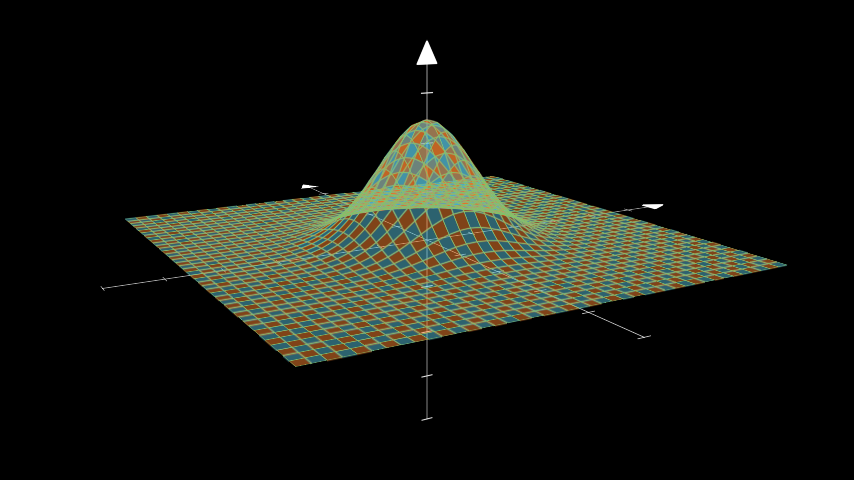

CPU times: user 2.78 s, sys: 102 ms, total: 2.89 s
Wall time: 1.43 s


In [4]:
%%time
%%manim $parampGL
class Example(ThreeDScene):
    def construct(self):
        resolution_fa = 42
        self.set_camera_orientation(phi=75 * DEGREES, theta=-30 * DEGREES)

        def param_gauss(u, v):
            x = u
            y = v
            sigma, mu = 0.4, [0.0, 0.0]
            d = np.linalg.norm(np.array([x - mu[0], y - mu[1]]))
            z = np.exp(-(d ** 2 / (2.0 * sigma ** 2)))
            return np.array([x, y, z])

        gauss_plane = Surface(
            param_gauss,
            resolution=(resolution_fa, resolution_fa),
            v_range=[-2, +2],
            u_range=[-2, +2]
        )

        gauss_plane.scale(2, about_point=ORIGIN)
        gauss_plane.set_style(fill_opacity=1,stroke_color=GREEN)
        gauss_plane.set_fill_by_checkerboard(ORANGE, BLUE, opacity=0.5)
        axes = ThreeDAxes()
        self.add(axes,gauss_plane)

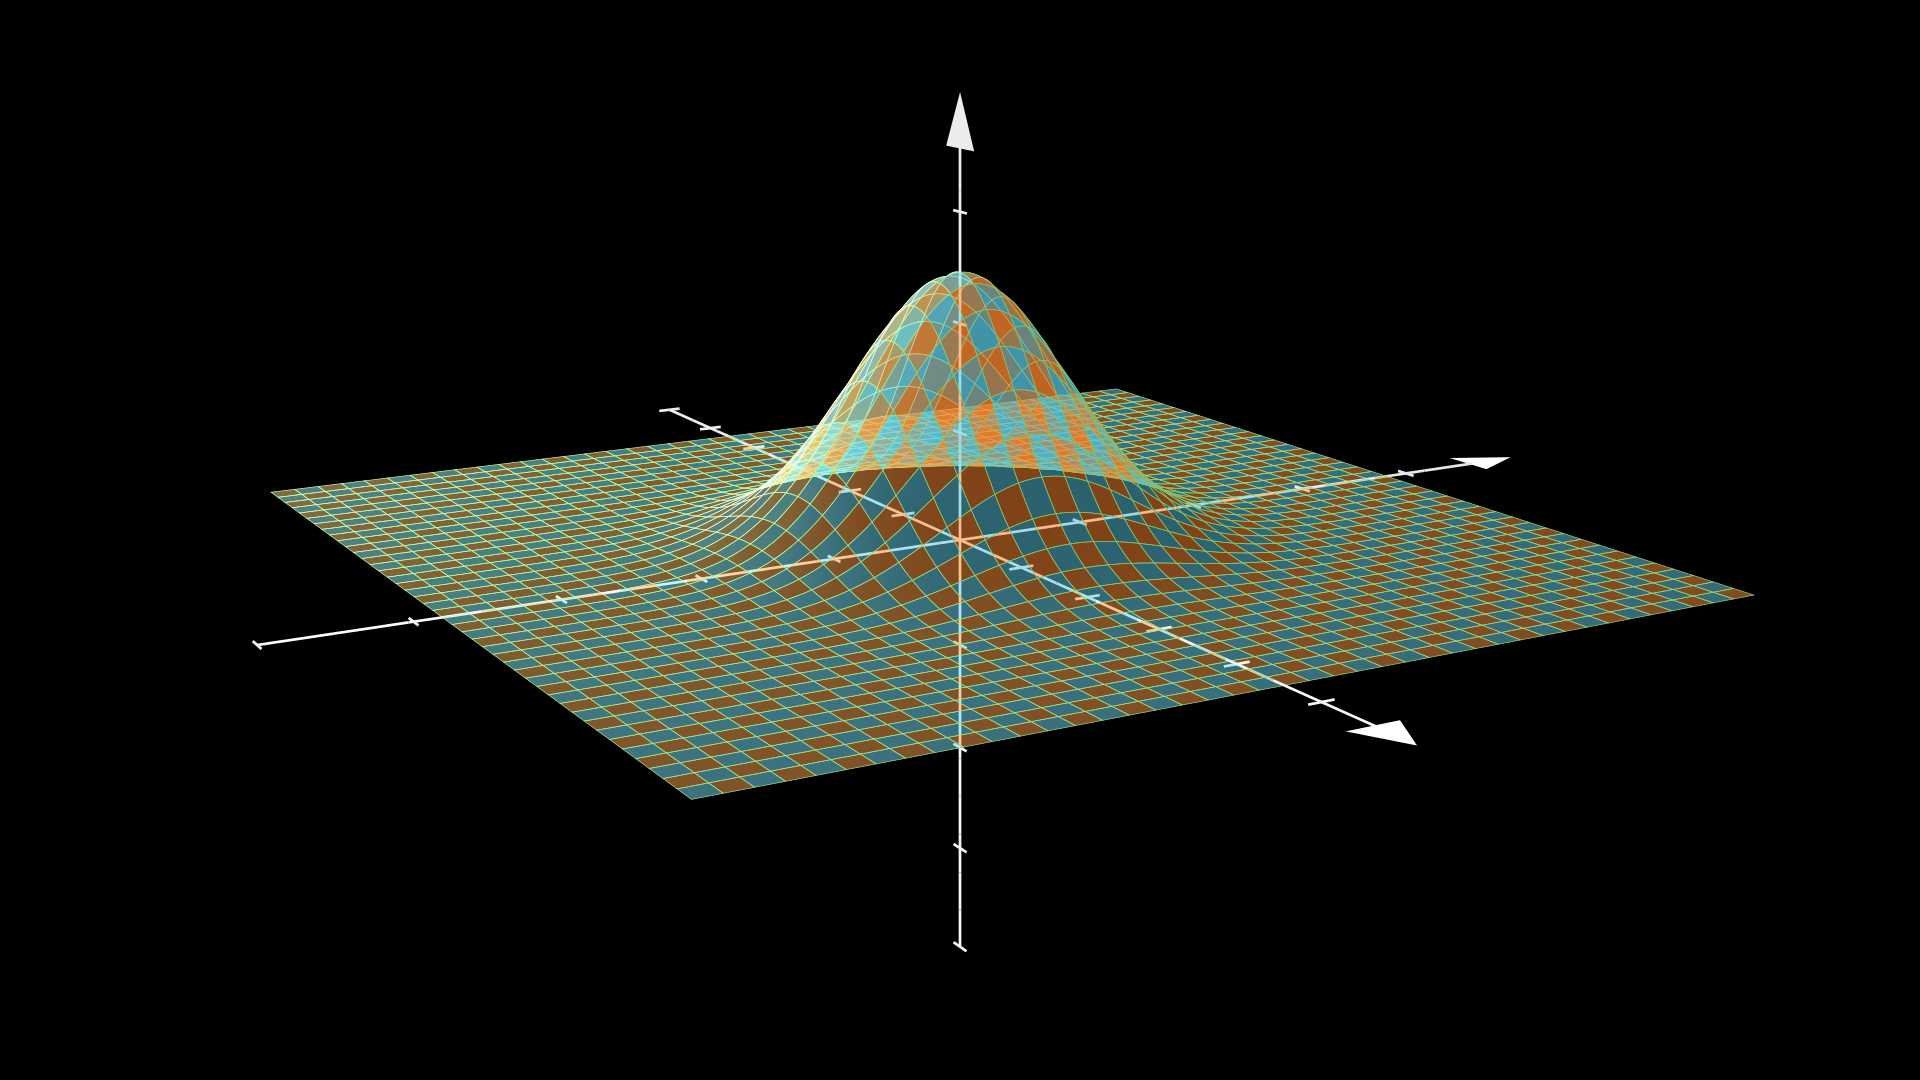

CPU times: user 1.13 s, sys: 20.8 ms, total: 1.15 s
Wall time: 1.14 s


In [5]:
%%time 
%%manim $param
## comparison of the same example to cairo:
class Example(ThreeDScene):
    def construct(self):
        resolution_fa = 42
        self.set_camera_orientation(phi=75 * DEGREES, theta=-30 * DEGREES)

        def param_gauss(u, v):
            x = u
            y = v
            sigma, mu = 0.4, [0.0, 0.0]
            d = np.linalg.norm(np.array([x - mu[0], y - mu[1]]))
            z = np.exp(-(d ** 2 / (2.0 * sigma ** 2)))
            return np.array([x, y, z])

        gauss_plane = Surface(
            param_gauss,
            resolution=(resolution_fa, resolution_fa),
            v_range=[-2, +2],
            u_range=[-2, +2]
        )

        gauss_plane.scale(2, about_point=ORIGIN)
        gauss_plane.set_style(fill_opacity=1,stroke_color=GREEN)
        gauss_plane.set_fill_by_checkerboard(ORANGE, BLUE, opacity=0.5)
        axes = ThreeDAxes()
        self.add(axes,gauss_plane)